<a href="https://colab.research.google.com/github/yoe174/PCVK_27_3C/blob/main/Kuis_2_PCVK_Yonatan_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Kuis 2 PCVK - Klasifikasi Kucing & Anjing**

### Nama : Yonatan Efrassetyo (27)
### NIM : 2241720063
### Kelas : TI-3C

## **Import Library**

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## **Download Data-Set (Kaggle)**

In [ ]:
# Library tambahan untuk mengakses dataset dari Kaggle
from google.colab import files

# Unggah file kaggle.json dari komputer lokal
from google.colab import files
files.upload()

# Membuat direktori .kaggle dan memindahkan kaggle.json ke dalamnya
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset anjing dan kucing dari Kaggle (ganti dengan dataset yang sesuai)
!kaggle datasets download -d 'tongpython/cat-and-dog'

# Ekstrak dataset
!unzip cat-and-dog.zip -d ./dataset


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: ./dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3715.jpg  
  inflating: ./dataset/training_set/training_

In [ ]:
# Pengaturan direktori dataset
train_dir = './dataset/training_set/training_set'
test_dir = './dataset/test_set/test_set'

# Konfigurasi parameter
image_size = (224, 224)  # Ukuran input untuk MobileNetV2
batch_size = 32
learning_rate = 1e-4
epochs = 10

# Data augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Data generator untuk validasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Load base model MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=image_size + (3,)
)

# Freeze base model layers
base_model.trainable = False

# Tambahkan layer klasifikasi custom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## **Buat Model**

In [ ]:
# Buat model baru
model = Model(inputs=base_model.input, outputs=output)

# Callbacks
model_checkpoint = ModelCheckpoint(
    'best_mobilenet_model.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## **Training**

In [ ]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8996 - loss: 0.2516
Epoch 1: val_accuracy improved from -inf to 0.98016, saving model to best_mobilenet_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 127s 472ms/step - accuracy: 0.8998 - loss: 0.2512 - val_accuracy: 0.9802 - val_loss: 0.0571 - learning_rate: 1.0000e-04
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9375 - loss: 0.2328
Epoch 2: val_accuracy improved from 0.98016 to 1.00000, saving model to best_mobilenet_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9375 - loss: 0.2328 - val_accuracy: 1.0000 - val_loss: 0.0228 - learning_rate: 1.0000e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9670 - loss: 0.0856
Epoch 3: val_accuracy did not improve from 1.00000
250/250 ━━━━━━━━━━━━━━━━━━━━ 116s 453ms/step - accuracy: 0.9671 - loss: 0.0856 - val_accuracy: 0.9802 - val_loss: 0.0570 - learning_rate: 1.0000e-04
Epoch 4/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms

In [ ]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9748 - loss: 0.0708
Test Loss: 0.04756058380007744
Test Accuracy: 0.9807217121124268


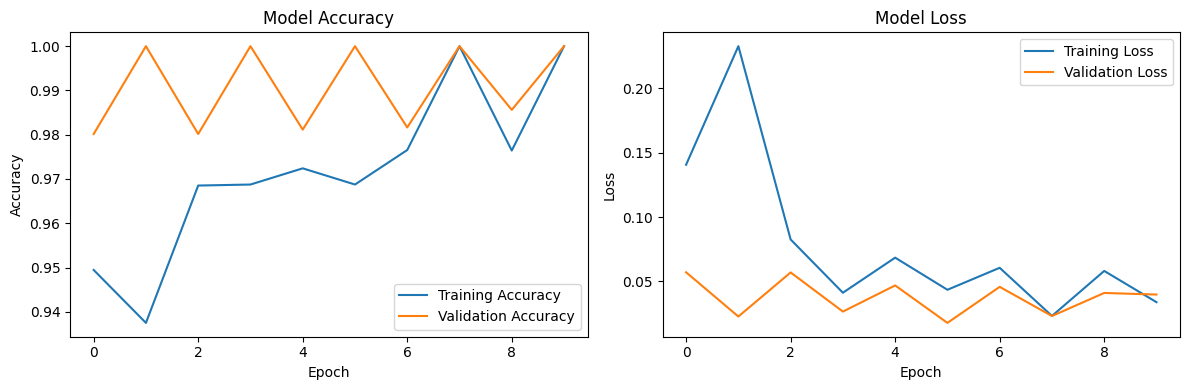

In [ ]:
# Plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## **Klasifikasi**

Saving kitten_01.png to kitten_01.png


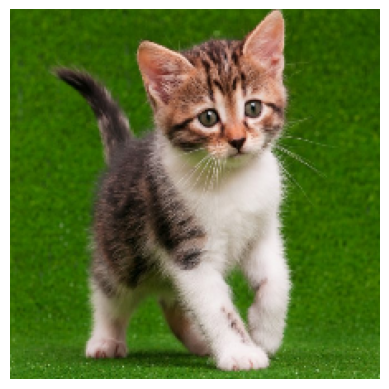

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Probabilitas Anjing: 0.002839463297277689
Probabilitas Kucing: 0.9971605367027223
Hasil Prediksi: Kucing


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

# Fungsi untuk memuat dan memprediksi gambar
def predict_image(img_path, model, threshold=0.6):
    # Memuat gambar dengan target_size yang sesuai dengan model (224, 224)
    img = image.load_img(img_path, target_size=(224, 224))  # Ubah target_size menjadi (224, 224)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    plt.imshow(img)
    plt.axis('off')  # Menonaktifkan sumbu
    plt.show()

    # Prediksi
    prediction = model.predict(img_array)

    # Ambil probabilitas untuk kedua kelas
    prob_anjing = prediction[0][0]  # Probabilitas anjing
    prob_kucing = 1 - prob_anjing   # Probabilitas kucing (1 - prob_anjing)

    print(f"Probabilitas Anjing: {prob_anjing}")
    print(f"Probabilitas Kucing: {prob_kucing}")

    # Menentukan kategori berdasarkan ambang batas
    if prob_anjing > threshold:
        return "Anjing"
    elif prob_kucing > threshold:
        return "Kucing"
    else:
        return "Bukan Keduanya"

# Mengunggah gambar dan mengambil path
uploaded = files.upload()
# Get the first filename from the uploaded dictionary
for filename in uploaded.keys():
    img_path = filename
    break  # Stop after getting the first filename

# Contoh penggunaan
# img_path = 'path_to_your_image.jpg'  # Ganti dengan path gambar yang akan diuji
# img_path = files.upload()  # Ganti dengan path gambar yang akan diuji
result = predict_image(img_path, model)  # Pass the filename to predict_image
print(f"Hasil Prediksi: {result}")

Saving Screenshot 2024-12-03 092337.png to Screenshot 2024-12-03 092337.png


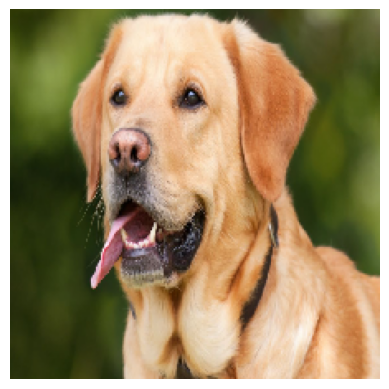

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probabilitas Anjing: 0.9998507499694824
Probabilitas Kucing: 0.00014925003051757812
Hasil Prediksi: Anjing


In [ ]:
# Mengunggah gambar dan mengambil path
uploaded = files.upload()
# Get the first filename from the uploaded dictionary
for filename in uploaded.keys():
    img_path = filename
    break  # Stop after getting the first filename

# Contoh penggunaan
# img_path = 'path_to_your_image.jpg'  # Ganti dengan path gambar yang akan diuji
# img_path = files.upload()  # Ganti dengan path gambar yang akan diuji
result = predict_image(img_path, model)  # Pass the filename to predict_image
print(f"Hasil Prediksi: {result}")